By Zeal Jinwala \
Date: January 30, 2022 \
Data Source: The Illumina and nanopore sequence datasets of the nose swab samples, generated and analyzed in the current study, are available in the European Nucleotide Archive (ENA) under accession number PRJEB28612. \
https://www.ebi.ac.uk/ena/browser/view/PRJEB28612?show=reads 


In [98]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [99]:
# input Nanopore Seq Data
# read input
def fasta_readfirst(file):
    from Bio import SeqIO
    df = pd.DataFrame(columns=['IDs', 'Seqs', 'Qscore'])
    for record in SeqIO.parse(file, "fastq"):
        score = record.letter_annotations["phred_quality"]
        df = df.append({'IDs': record.id, 'Seqs': record.seq, 'Qscore':score}, ignore_index=True)
    return df

# Read Length Distribution

Text(0.5, 1.0, 'Nanopore Length distribution')

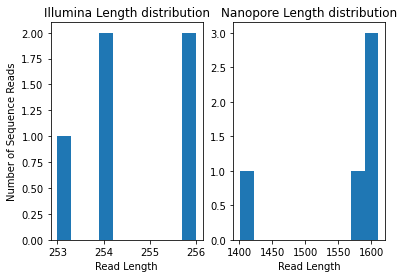

In [131]:
fileIllumina = "/Users/zsj24/GitHub/Computational-Analysis/sampleIllumina.fastq"
fileNanopore = "/Users/zsj24/GitHub/Computational-Analysis/sampleNanopore.fastq"
dfIllumina = fasta_readfirst(fileIllumina)
dfNanopore = fasta_readfirst(fileNanopore)
readLengthsIL = dfIllumina['Seqs'].str.len()
plt.subplot(1, 2, 1)
plt.hist(readLengthsIL)
plt.xlabel("Read Length")
plt.ylabel('Number of Sequence Reads')
plt.title('Illumina Length distribution')
readLengthsNP = dfNanopore['Seqs'].str.len()
plt.subplot(1, 2, 2)
plt.hist(readLengthsNP)
plt.xlabel("Read Length")
plt.title('Nanopore Length distribution')

Figure 1: This figure represents the distribution and average length of sequences in sequencing data using Oxford Nanopore Sequencing. In Subplot 1,  the y-axis represents the Number of sequence Reads and the x-axis represents the Sequence Read Length. Subplot 2 is a box and whisker plot for the Read Length.

Text(0.5, 1.0, 'Nanopore')

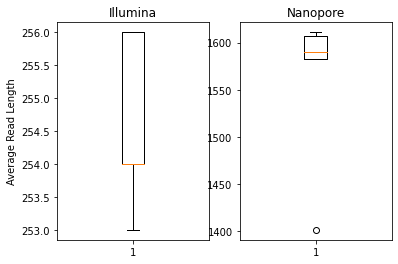

In [138]:
plt.subplot(1, 2, 1)
plt.boxplot(readLengthsIL)
plt.ylabel('Average Read Length')
plt.title('Illumina')
plt.subplot(1, 2, 2)
plt.boxplot(readLengthsNP)
plt.title('Nanopore')

Figure 2: ......

# Quality score distribution 

Text(0.5, 1.0, 'Nanopore')

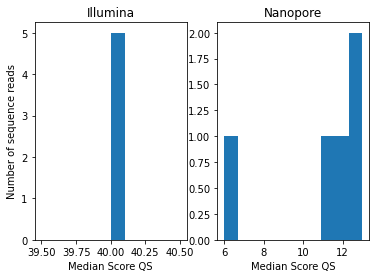

In [145]:
QscoreIL = dfIllumina['Qscore'] 
meanQSIL = [round(np.mean(QscoreIL[i]),2) for i in range(len(QscoreIL))]
medianQSIL = [round(np.median(QscoreIL[i]),2) for i in range(len(QscoreIL))]
stdQSIL = [round(np.std(QscoreIL[i]),2) for i in range(len(QscoreIL))]

QscoreNP = dfNanopore['Qscore'] 
meanQSNP = [round(np.mean(QscoreNP[i]),2) for i in range(len(QscoreNP))]
medianQSNP = [round(np.median(QscoreNP[i]),2) for i in range(len(QscoreNP))]
stdQSNP = [round(np.std(QscoreNP[i]),2) for i in range(len(QscoreNP))]

plt.subplot(1,2,1)
plt.hist(medianQSIL)
plt.xlabel('Median Score QS')
plt.ylabel('Number of sequence reads')
plt.title('Illumina')
plt.subplot(1,2,2) 
plt.hist(medianQSNP)
plt.xlabel('Median Score QS')
plt.title('Nanopore')

Figure 3: .....

Text(0.5, 1.0, 'Nanopore')

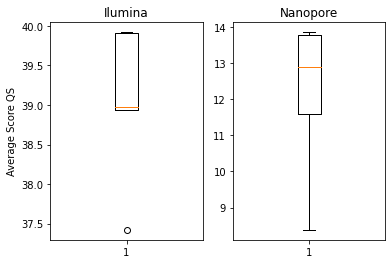

In [146]:
plt.subplot(1,2,1)
plt.boxplot(meanQSIL)
plt.ylabel('Average Score QS')
plt.title('Ilumina')
plt.subplot(1,2,2)
plt.boxplot(meanQSNP)
plt.title('Nanopore')

Figure 3: .....

# GC content